In [73]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

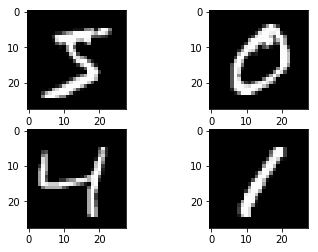

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [29]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [30]:
seed = 7
numpy.random.seed(seed)

In [31]:
# flatten 28*28 images to a 784 vector for each image
(X_train,y_train),(X_test,y_test)=mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

In [32]:
# normalize inputs from 0-255 to 0-1
X_train=X_train/255
X_test = X_test / 255

In [63]:
X_train[0].shape

(28, 28)

In [33]:
y_train=np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

In [34]:
def snn_model():
    model=Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

scores=model.evaluate(X_test,y_test,verbose=0)
print("Neural network Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2794 - acc: 0.9206 - val_loss: 0.1415 - val_acc: 0.9565
Epoch 2/10
 - 6s - loss: 0.1117 - acc: 0.9675 - val_loss: 0.0922 - val_acc: 0.9715
Epoch 3/10
 - 6s - loss: 0.0715 - acc: 0.9797 - val_loss: 0.0781 - val_acc: 0.9776
Epoch 4/10
 - 6s - loss: 0.0503 - acc: 0.9856 - val_loss: 0.0739 - val_acc: 0.9767
Epoch 5/10
 - 6s - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0683 - val_acc: 0.9790
Epoch 6/10
 - 6s - loss: 0.0268 - acc: 0.9928 - val_loss: 0.0635 - val_acc: 0.9797
Epoch 7/10
 - 6s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0606 - val_acc: 0.9812
Epoch 8/10
 - 6s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0618 - val_acc: 0.9808
Epoch 9/10
 - 6s - loss: 0.0109 - acc: 0.9978 - val_loss: 0.0571 - val_acc: 0.9818
Epoch 10/10
 - 6s - loss: 0.0080 - acc: 0.9984 - val_loss: 0.0576 - val_acc: 0.9815
Neural network Error: 1.85%


In [10]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

In [11]:

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),input_shape=(1,28,28),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [13]:
model = cnn_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 157s - loss: 0.2410 - acc: 0.9312 - val_loss: 0.0702 - val_acc: 0.9788
Epoch 2/10
 - 151s - loss: 0.0699 - acc: 0.9795 - val_loss: 0.0463 - val_acc: 0.9859
Epoch 3/10
 - 161s - loss: 0.0501 - acc: 0.9854 - val_loss: 0.0369 - val_acc: 0.9887
Epoch 4/10
 - 146s - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 5/10
 - 146s - loss: 0.0321 - acc: 0.9901 - val_loss: 0.0445 - val_acc: 0.9856
Epoch 6/10
 - 153s - loss: 0.0254 - acc: 0.9921 - val_loss: 0.0342 - val_acc: 0.9877
Epoch 7/10
 - 160s - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0348 - val_acc: 0.9886
Epoch 8/10
 - 152s - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0316 - val_acc: 0.9896
Epoch 9/10
 - 152s - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0381 - val_acc: 0.9880
Epoch 10/10
 - 155s - loss: 0.0137 - acc: 0.9960 - val_loss: 0.0282 - val_acc: 0.9906
CNN Error: 0.94%


In [15]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
model = larger_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3744 - acc: 0.8902 - val_loss: 0.0782 - val_acc: 0.9756
Epoch 2/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0972 - acc: 0.9702 - val_loss: 0.0573 - val_acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0711 - acc: 0.9780 - val_loss: 0.0443 - val_acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0578 - acc: 0.9820 - val_loss: 0.0327 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0493 - acc: 0.9846 - val_loss: 0.0307 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0441 - acc: 0.9867 - val_loss: 0.0304 - val_acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0399 - acc: 0.9873 - val_loss: 0.0274 - 

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


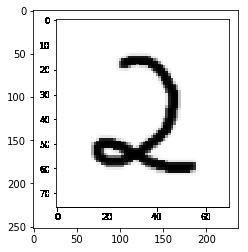

In [97]:
import cv2
img_pred = cv2.imread("2.png", 0)
plt.imshow(img_pred, cmap='gray')

In [98]:
print(img_pred.shape)
img_pred=cv2.resize(img_pred, (28, 28))
img_pred=img_pred.flatten()
img_pred=np.expand_dims(img_pred,axis=0)
print(img_pred.shape)

(252, 237)
(1, 784)


In [99]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], "Perccentage ", pred_proba)

5 Perccentage  100.00%
